# 1) Gradient descent on multivariate functions

We'll focus on optimizing complicated models (which are, at their heart, multivariate functions) for the rest of the course and the gradient descent algorithm plays a central role in helping us optimize these functions.

We'll examine two different 2-dimensional functions: the Himmelblau and Rosenbrock functions, and we'll also examine a secret 50-dimensional function (I'll tell you more about it later, but if you are diligent, if you explore the structure of the function and of the optimal x-value, and if you mess around with plotting, I suspect you may come to have an idea about what it is). I have implemented each of the functions and their gradients in the following cell of code.

In [ ]:
import numpy as np

# Himmelblau function
def himmelblau_f(x):
  
  func = (x[0]**2 + x[1] - 11)**2 + (x[0] + x[1]**2 - 7)**2
  
  return func

# Himmelblau gradient
def himmelblau_g(x):

  grad = np.zeros((2, 1))

  grad[0] = 4.0 * x[0]**3 + 4.0 * x[0] * x[1] - 44.0 * x[0] + 2.0 * x[0] + 2.0 * x[1]**2 - 14.0
  grad[1] = 2.0 * x[0]**2 + 2.0 * x[1] - 22.0 + 4.0 * x[0] * x[1] + 4.0 * x[1]**3 - 28.0 * x[1]

  return grad


# Rosenbrock function
def rosenbrock_f(x):

  func = (1.0 - x[0])**2 + 100.0 * (x[1] - x[0]**2)**2

  return func

# Rosenbrock gradient
def rosenbrock_g(x):

  grad = np.zeros((2, 1))

  grad[0] = -2.0 * (1.0 - x[0]) - 400.0 * (x[1] - x[0]**2) * x[0]
  grad[1] = 200.0 * (x[1] - x[0]**2)

  return grad


# secret function
def secret_f(x):

  m = np.linspace(0, 0.1, 25)
  g = 9.8
  k = 100

  func = 0

  for i in range(25):
    if i == 0:
      func += (0.0  - x[i+1])**2 + (0.0     - x[i+26])**2
    elif i == 24:
      func += (x[i] - 1.0   )**2 + (x[i+25] - 0.0    )**2
    else:
      func += (x[i] - x[i+1])**2 + (x[i+25] - x[i+26])**2

  func *= 0.5*k

  func += np.sum(m*g*x[25::])

  return func

# secret gradient
def secret_g(x):

  grad = np.zeros((50,1))

  m = np.linspace(0, 0.1, 25)
  g = 9.8
  k = 100

  for i in range(25):

    if i == 0:
      grad[i] = k*(-0.0    + 2*x[i] - x[i+1])
    elif i == 24:
      grad[i] = k*(-x[i-1] + 2*x[i] - 1.0)
    else:
      grad[i] = k*(-x[i-1] + 2*x[i] - x[i+1])

    if i == 0:
      grad[i+25] = m[i]*g + k*(-0.0       + 2*x[i+25] - x[i+1+25])
    elif i == 24:
      grad[i+25] = m[i]*g + k*(-x[i-1+25] + 2*x[i+25] - 0.0)
    else:
      grad[i+25] = m[i]*g + k*(-x[i-1+25] + 2*x[i+25] - x[i+1+25])
      

  return grad

The next cell of code is a set of random initialization functions that you can use to test the robustness of your implementation of gradient descent. For example, to get a random $x_0$ value for the Himmelblau function, type `x0 = himmelblau_init()`.

In [ ]:
# initialization functions

def himmelblau_init():
  
  return np.clip(np.random.normal(size=(2,1)), -3.0, 3.0)

def rosenbrock_init():
  
  return np.clip(np.random.normal(size=(2,1)), -3.0, 3.0)

def secret_init():

  return np.random.random((50,1))

## Gradient descent
a.k.a: gradient descent without momentum or vanilla gradient descent

First, write a function that takes in a `(d, 1)`-dimensional initial guess ($x_0$-vector) and then performs `k` iterations of (multivariate) gradient descent *without momentum*. Your function should output the entire optimization history as a `(d, k+1)` array since we will want to visualize it.

In [ ]:
h0 = himmelblau_init()
r0 = rosenbrock_init()

In [ ]:
def gradient_descent(x0, d, alpha, g, k):

  x = np.zeros([k+1, d])
  x[0] = x0.reshape(1,d)

  for i in range(k):
    x[i+1] = x[i] - alpha*(g(x[i]).reshape(1,d))

  return x

In [ ]:
x_hist_h = gradient_descent(h0, 2, 0.01, himmelblau_g, 100)
print(x_hist_h[-3:-1])

[[3. 2.]
 [3. 2.]]


In [ ]:
x_hist_r = gradient_descent(r0, 2, 0.0001, rosenbrock_g, 600000)
x_hist_r[-3:-1]

array([[1., 1.],
       [1., 1.]])

In [ ]:
s0 = secret_init()

In [ ]:
x_hist_s = gradient_descent(s0, 50, 0.001, secret_g, 10000)
x_hist_s[-3:-1]

array([[ 0.03846154,  0.07692307,  0.11538461,  0.15384614,  0.19230768,
         0.23076921,  0.26923075,  0.30769229,  0.34615382,  0.38461536,
         0.4230769 ,  0.46153843,  0.49999997,  0.53846151,  0.57692305,
         0.61538459,  0.65384613,  0.69230767,  0.73076921,  0.76923075,
         0.80769229,  0.84615383,  0.88461538,  0.92307692,  0.96153846,
        -0.04083328, -0.08166655, -0.1220915 , -0.16169978, -0.20008306,
        -0.23683301, -0.2715413 , -0.3037996 , -0.33319957, -0.35933288,
        -0.3817912 , -0.40016619, -0.41404952, -0.42303285, -0.42670786,
        -0.42466621, -0.41649957, -0.4017996 , -0.38015797, -0.35116635,
        -0.31441639, -0.26949978, -0.21600816, -0.15353322, -0.08166661],
       [ 0.03846154,  0.07692307,  0.11538461,  0.15384614,  0.19230768,
         0.23076921,  0.26923075,  0.30769229,  0.34615382,  0.38461536,
         0.4230769 ,  0.46153843,  0.49999997,  0.53846151,  0.57692305,
         0.61538459,  0.65384613,  0.69230767,  0.

For each of the three different functions, run gradient descent and
tune the learning rate to achieve robust convergence to the minimum (or minima). Note: for the two-dimensional functions, the function value at the minimum (or minima) is exactly zero ($f(x^*) = 0$). Since for these 2D functions, we know the exact value of the minimum, you might consider a new convergence criteria that stops when the function value is close to zero (within some tolerance, maybe 1E-2, 1E-4, or 1E-6, but the exact value is up to you). If you implement this convergence criterion, later you might compare the number of iterations to convergence using regular gradient descent with the number of iterations to convergence using gradient descent with momentum (which you'll implement in later cells).

In [ ]:
# set the random seed for repeatable randomness
np.random.seed(1)

### MAKE STORAGE VECTORS OR ARRAYS HERE FOR ANYTHING YOU WANT TO SAVE

n_inits = 10 # edit as necessary while debugging
main_arr_h = []
main_arr_r = []
main_arr_s = []

for _ in range(n_inits):

  ### GET RANDOM INITIALIZATION 
  h0 = himmelblau_init()
  r0 = rosenbrock_init()
  s0 = secret_init() 

  ### DO ENTIRE GRADIENT DESCENT STARTING FROM X0
  arr_temp_h = gradient_descent(h0, 2, 0.01, himmelblau_g, 100)
  arr_temp_r = gradient_descent(r0, 2, 0.0001, rosenbrock_g, 600000)
  arr_temp_s = gradient_descent(s0, 50, 0.001, secret_g, 10000)

  ### APPEND OR UPDATE STORAGE VECTORS/ARRAYS AS NECESSARY  
  main_arr_h.append(arr_temp_h)
  main_arr_r.append(arr_temp_r)
  main_arr_s.append(arr_temp_s)

Now, for the two different two-dimensional functions, generate a contour plot of the function (using `plt.contourf`; I will go over an example of this in office hours on Monday, but I encourage you try it yourself first by searching the documentation and by learning from examples online) and overlay 3 different randomly-initialized optimization paths on the contour plot. You can re-use the structure of the code from above to do three random initializations and then store the optimization histories, which you can then plot on top of the contour plot. It should look similar to the contour plots with optimization paths from the interactive we looked at in class (https://www.benfrederickson.com/numerical-optimization/).

(100, 100) (100, 100)


Text(0.5, 0, 'z')

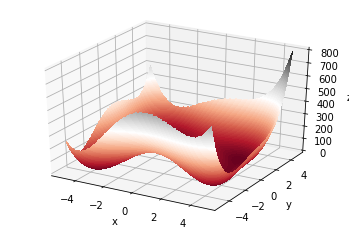

In [ ]:
import matplotlib.pyplot as plt

#Himmelblau function
def himmelblau_f2(x,y):
  return (x**2 + y - 11)**2 + (x + y**2 - 7)**2

x = np.arange(-5, 5, 0.1)
y = np.arange(-5, 5, 0.1)

X, Y = np.meshgrid(x, y)
print(X.shape,Y.shape)
Z = himmelblau_f2(X, Y)
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.contourf(X, Y, Z, 100, cmap='RdGy')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')


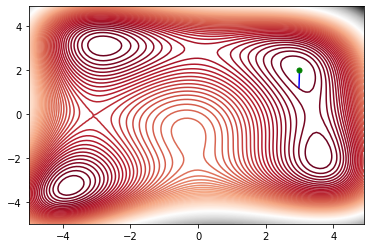

In [ ]:
plt.contour(X, Y, Z, 100, cmap='RdGy')
plt.plot([x_hist_h[1][0], x_hist_h[-1][0]], [x_hist_h[1][1],x_hist_h[-1][1]], c='b')
plt.plot(x_hist_h[-1][0], x_hist_h[-1][1], marker='o',c='g', ms=5)

(100, 100) (100, 100)


Text(0.5, 0, 'z')

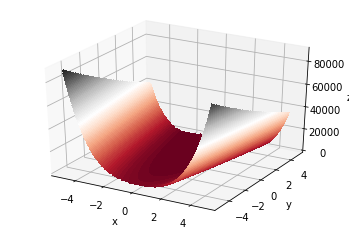

In [ ]:
#Rosenbrock function
def rosenbrock_f2(x,y):
  return (1.0 - x)**2 + 100.0 * (y - x**2)**2

x = np.arange(-5, 5, 0.1)
y = np.arange(-5, 5, 0.1)

X, Y = np.meshgrid(x, y)
print(X.shape,Y.shape)
Z = rosenbrock_f2(X, Y)
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.contourf(X, Y, Z, 100, cmap='RdGy')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

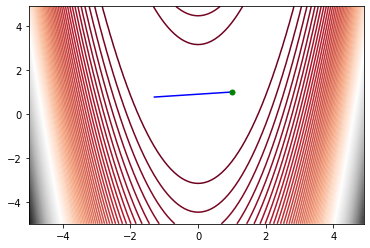

In [ ]:
plt.contour(X, Y, Z, 100, cmap='RdGy')
plt.plot([x_hist_r[1][0],x_hist_r[-1][0]], [x_hist_r[1][1],x_hist_r[-1][1]], c='b')
plt.plot(x_hist_r[-1][0], x_hist_r[-1][1], marker='o',c='g', ms=5)

## Gradient descent with momentum

Now, write a new function that performs (multivariate) gradient descent with momentum.


In [ ]:
def gradient_descent_with_momentum(x0, d, alpha, beta, g, k):

  x = np.zeros([k+1, d])
  x[0] = x0.reshape(1,d)
  v = 0

  for i in range(k):
    v = beta*v  - alpha*(g(x[i]).reshape(1,d))
    x[i+1] = x[i] + v

  return x

In [ ]:
x_hist_h_ = gradient_descent_with_momentum(h0, 2, 0.01, 0.9, himmelblau_g, 100)
x_hist_r_ = gradient_descent_with_momentum(r0, 2, 0.0001, 0.9, rosenbrock_g, 600000)
x_hist_s_ = gradient_descent_with_momentum(s0, 50, 0.001, 0.9, secret_g, 10000)
print(x_hist_h_[-3:-1])
print(x_hist_r_[-3:-1])
print(x_hist_s_[-3:-1])

[[-3.78829687 -3.29614695]
 [-3.77822371 -3.29321818]]
[[1. 1.]
 [1. 1.]]
[[ 0.03846154  0.07692308  0.11538462  0.15384615  0.19230769  0.23076923
   0.26923077  0.30769231  0.34615385  0.38461538  0.42307692  0.46153846
   0.5         0.53846154  0.57692308  0.61538462  0.65384615  0.69230769
   0.73076923  0.76923077  0.80769231  0.84615385  0.88461538  0.92307692
   0.96153846 -0.04083333 -0.08166667 -0.12209167 -0.1617     -0.20008333
  -0.23683333 -0.27154167 -0.3038     -0.3332     -0.35933333 -0.38179167
  -0.40016667 -0.41405    -0.42303333 -0.42670833 -0.42466667 -0.4165
  -0.4018     -0.38015833 -0.35116667 -0.31441667 -0.2695     -0.21600833
  -0.15353333 -0.08166667]
 [ 0.03846154  0.07692308  0.11538462  0.15384615  0.19230769  0.23076923
   0.26923077  0.30769231  0.34615385  0.38461538  0.42307692  0.46153846
   0.5         0.53846154  0.57692308  0.61538462  0.65384615  0.69230769
   0.73076923  0.76923077  0.80769231  0.84615385  0.88461538  0.92307692
   0.96153846 -

For each of the three different functions, run gradient descent with momentum and tune the learning rate and momentum decay to achieve robust convergence to the minimum (or minima). Use similar convergence criteria as you did for your gradient descent algorithm.

In [ ]:
# set the random seed for repeatable randomness
np.random.seed(1)

### MAKE STORAGE VECTORS OR ARRAYS HERE FOR ANYTHING YOU WANT TO SAVE

n_inits = 10 # edit as necessary while debugging
main_arr_h_ = []
main_arr_r_ = []
main_arr_s_ = []

for _ in range(n_inits):

  ### GET RANDOM INITIALIZATION 
  h0 = himmelblau_init()
  r0 = rosenbrock_init()
  s0 = secret_init() 

  ### DO ENTIRE GRADIENT DESCENT STARTING FROM X0
  arr_temp_h = gradient_descent_with_momentum(h0, 2, 0.01, 0.9, himmelblau_g, 100)
  arr_temp_r = gradient_descent_with_momentum(r0, 2, 0.0001, 0.9, rosenbrock_g, 600000)
  arr_temp_s = gradient_descent_with_momentum(s0, 50, 0.001, 0.9, secret_g, 10000)

  ### APPEND OR UPDATE STORAGE VECTORS/ARRAYS AS NECESSARY  
  main_arr_h_.append(arr_temp_h)
  main_arr_r_.append(arr_temp_r)
  main_arr_s_.append(arr_temp_s)

Now, again, for the two different two-dimensional functions, generate a contour plot of the function and overlay 3 different randomly-initialized optimization paths on the contour plot. You can re-use the structure of the code from above to do three random initializations and then store the optimization histories.

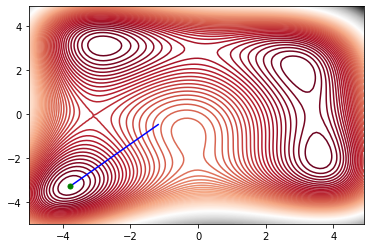

In [ ]:
plt.contour(X, Y, Z, 100, cmap='RdGy')
plt.plot([x_hist_h_[1][0], x_hist_h_[-1][0]], [x_hist_h_[1][1],x_hist_h_[-1][1]], c='b')
plt.plot(x_hist_h_[-1][0], x_hist_h_[-1][1], marker='o',c='g', ms=5)

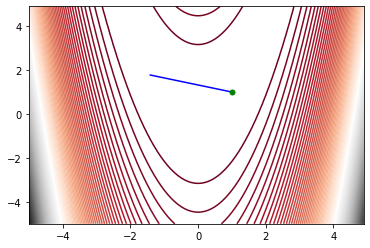

In [ ]:
plt.contour(X, Y, Z, 100, cmap='RdGy')
plt.plot([x_hist_r_[1][0],x_hist_r_[-1][0]], [x_hist_r_[1][1],x_hist_r_[-1][1]], c='b')
plt.plot(x_hist_r_[-1][0], x_hist_r_[-1][1], marker='o',c='g', ms=5)

(Not required) If you want to explore gradient descent on more benchmark functions, there are a list of functions here: http://benchmarkfcns.xyz/fcns. Feel free to implement any function you are interested in, compute the gradient yourself or using Wolfram-Alpha, implement the gradient as a function in Python, and then perform gradient descent (with or without momentum) and show a plot.

In [ ]:
### CODE HERE

# 2) Linear regression using the normal equations

Using the normal equations, we can fit the generalization of a line in multiple dimensions. Assuming y is 1-dimensional:
* with x as 1-dimensional, we fit a line
* with x as 2-dimensional, we fit a plane
* with x as d-dimensional, we fit a d-dimensional [hyperplane](https://en.wikipedia.org/wiki/Hyperplane). 

Remember the normal equations are:

$$ \theta^* = (X^TX)^{-1}X^Ty $$

You can access the transpose of a numpy array using the `.T` attribute and you can compute the inverse using `np.linalg.inv`. **Each time** you perform a matrix multiplication left to right, you should use the `@` symbol so that Numpy performs the proper matrix multiplication (not broadcasted elementwise multiplication).

Below I have generated sample data from a specific line and from a specific plane. I then added noise to the dataset.

In [ ]:
np.random.seed(1)

# first dataset
X1 = 500*np.random.random((250,1)) - 250

# true equation
y1 = 200 + 3.4*X1[:,0]

# add noise
y1 = y1.reshape(-1,1) + np.random.normal(loc=0.0, scale=100.0, size=(250,1))


# second dataset
X2 = np.append(100*np.random.random((1000,1)), 1000*np.random.random((1000,1)), axis=1)

# true equation
y2 = -0.9 + 0.2*X2[:,0] - 0.04*X2[:,1]

# add noise
y2 = y2.reshape(-1,1) + np.random.normal(loc=0.0, scale=5.0, size=(1000,1))

Now, for the first dataset, solve the normal equations (remember to add the column of ones to the left side of your `X` matrix) and compare the coefficients you get from the normal equations and from the true equation (in the code above) that generated that data. 

In [ ]:
#Using Normal Equations
X1_ = np.ones(len(X1))
X1_ = X1_.reshape(-1,1)
x1 = np.append(X1_, X1,axis=1)
theta_mat = (np.linalg.inv(x1.T @ x1))@(x1.T @ y1)
print("Theta0 = %.2f" %theta_mat[0])
print("Theta1 = %.2f" %theta_mat[1])

Theta0 = 203.84
Theta1 = 3.43


In [ ]:
#Checking implementation using SkLearn library
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X1, y1)
print("Theta0 = %.2f" %reg.intercept_)
print("Theta1 = %.2f" %reg.coef_)

Theta0 = 203.84
Theta1 = 3.43


Generate a scatterplot of the dataset and then plot the line generated using the normal equations over the range $x \in [-250, 250]$. If you want, you can also plot the true line.

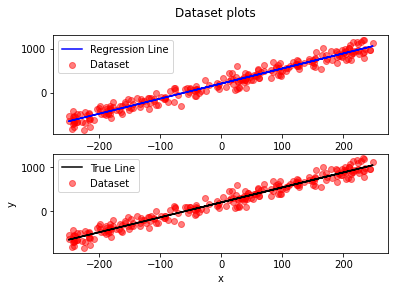

In [ ]:
reg_line = theta_mat[0] + theta_mat[1]*X1[:,0]
true_line = 200 + 3.4*X1[:,0]
fig, axs = plt.subplots(2)
fig.suptitle('Dataset plots')
axs[0].plot(X1, reg_line, c='b',label="Regression Line")
axs[0].scatter(X1, y1, c='r',marker='o', alpha=0.5, label='Dataset')
axs[1].plot(X1, true_line, c='black', label="True Line")
axs[1].scatter(X1, y1, c='r',marker='o', alpha=0.5, label='Dataset')
plt.xlabel('x')
plt.ylabel('y')
axs[0].legend()
axs[1].legend()

Calculating the accuracy of the line fit

In [ ]:
from sklearn.metrics import r2_score
Y1 = 200 + 3.4*X1[:,0] #Originial y1
print("The R2 score for the data set is: %.2f" %r2_score(y1, Y1))

The R2 score for the data set is: 0.96


For the second dataset, solve the normal equations (remember to add the column of ones to the left side of your `X` matrix) and compare the coefficients you get from the normal equations and from the true equation (in the code above) that generated that data. 

In [ ]:
#Using Normal Equations
X2_ = np.ones(len(X2))
X2_ = X2_.reshape(-1,1)
x2 = np.append(X2_, X2,axis=1)
theta_mat_ = (np.linalg.inv(x2.T @ x2))@(x2.T @ y2)
print("Theta0 = %.2f" %theta_mat_[0])
print("Theta1 = %.2f" %theta_mat_[1])
print("Theta2 = %.2f" %theta_mat_[2])

Theta0 = -0.61
Theta1 = 0.19
Theta2 = -0.04


In [ ]:
#Checking implementation using SkLearn library
reg_ = LinearRegression()
reg_.fit(X2, y2)
print("Theta0 = %.2f" %reg_.intercept_)
print("Theta1 = %.2f" %reg_.coef_[0][0])
print("Theta2 = %.2f" %reg_.coef_[0][1])

Theta0 = -0.61
Theta1 = 0.19
Theta2 = -0.04


Calculating the accuracy of the fit of the dataset

In [ ]:
Y2 = -0.9 + 0.2*X2[:,0] - 0.04*X2[:,1] #Originial y2
print("The R2 score for the data set is: %.2f" %r2_score(y2, Y2))

The R2 score for the data set is: 0.87


(Not required) Generate a scatterplot of the dataset and then plot the plane generated using the normal equations over the range $(x, y) \in [0, 100] \times [0, 1000]$. If you want, you can also plot the true plane. (You might be able to re-use some of the 3D plotting examples we did in problem set 2.) 

In [ ]:
### CODE HERE

In [ ]:
X=np.array([[1,2,3],
            [4,5,6]])
np.sum(X, axis=0)

array([5, 7, 9])

In [ ]:
import numpy as np
np.ones(2)

array([1., 1.])

In [ ]:
theta= np.array([[1],
                [2],
                 [3]])

In [ ]:
t = theta.reshape(-1,1)
preds = np.zeros((X.shape[0], X.shape[1]))
for i in range(len(t)):
    preds_1 = t[i,0] * X[:,i]
    preds = preds[:,i] + preds_1.reshape(-1,1)
print(preds)

IndexError: ignored

In [ ]:
preds = np.zeros((X.shape[0], X.shape[1]))
preds

array([[0., 0., 0.],
       [0., 0., 0.]])

In [ ]:
preds_1 = (t[1,0] * X[:,1])

In [ ]:
preds[:,1:2] = preds_1.reshape(-1,1)

In [ ]:
preds

array([[ 0.,  4.,  0.],
       [ 0., 10.,  0.]])

In [ ]:
np.sum(preds,axis=1)

array([ 4., 10.])